# Homework 9
Wesley Sandide<br>
Friday, November 9th

<b>Exercise 1</b> <i>Continuous Fourier transforms</i> [14 points]<br><br>

Consider the function
<center>$f(t)=sinc^2(t)\equiv \frac{sin^2(t)}{t^2}$</center>
Its continuous Fourier transform equals
<center>$f(ω) = πΛ(ω/2),$</center><br>
where $Λ(x)$ is the triangle function, whose graph has the shape of a triangle between $x = −1$ and $x = 1$ with height $1$ at $x = 0$. This function can be defined via $Λ(x) =max(1 − |x|,0)$.<br><br>
Make a plot of $f(t)$. Then, following the steps from the lecture and the lab, compute the Fourier transform of $f(t)$ numerically and compare your result to the exact analytical solution $f(ω)$. You need to choose suitable values for the time step and overall time interval
at which you evaluate $f(t)$ to get good agreement. Plot your numerical solution for the Fourier transform together with the analytical solution in one graph to demonstrate that they agree.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import ifft, fft, fftfreq, fftshift, ifftshift
from numpy import sin, pi, exp

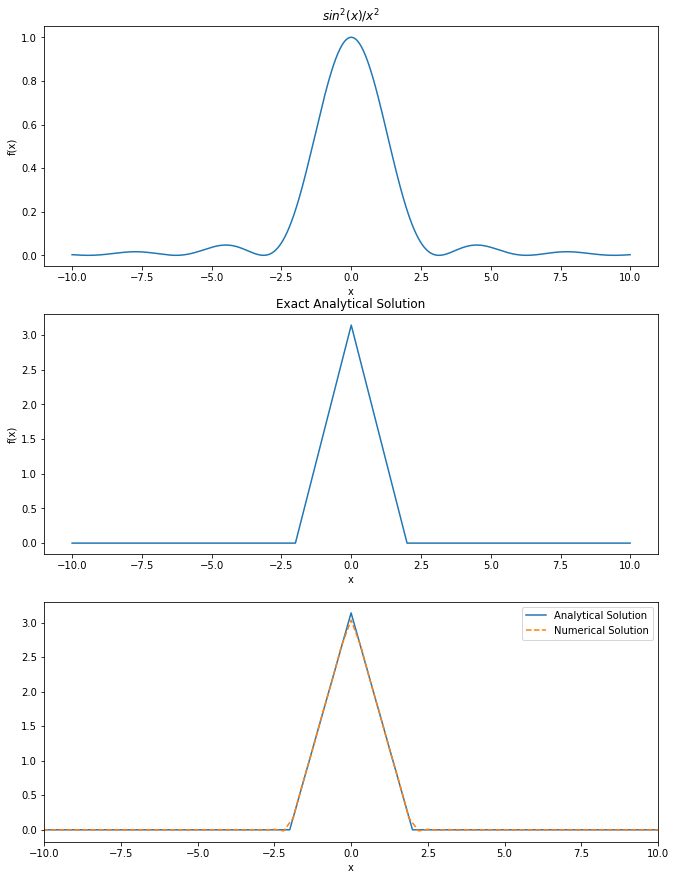

In [2]:
xmax = 10
dx = 0.01
x = np.arange(-xmax,xmax,dx)
N = len(x)

def f(x):
    return (sin(x)*sin(x))/(x*x)

def ft(omega):
    return pi*np.maximum((1-np.abs(omega/2)),0)

def myfft(xmax, dx):
    dFreq = 2*np.pi/dx/N
    freqMax = dFreq*N/2
    freq = np.arange(-freqMax,freqMax,dFreq)
    
    fftF = fftshift(fft(ifftshift(f(x))))
    
    ftNumerical = np.real(dx*fftF)
    
    return freq, ftNumerical

yRange = ft(x)

numSol = myfft(N,dx)

fig = plt.figure(figsize=(11,15))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Make a plot of  f(t).
ax1.plot(x,f(x))
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.set_title('$sin^2(x)/x^2$')

ax2.plot(x, yRange)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('Exact Analytical Solution')

ax3.plot(x, ft(x), label='Analytical Solution')
ax3.plot(numSol[0],numSol[1],'--', label='Numerical Solution')
ax3.set_xlim(-xmax,xmax)
ax3.set_xlabel('x')
ax3.legend()

<b>Exercise 2</b> <i>Detecting periodicity with Fourier transforms</i> [8 points]<br><br>

Examine the attached file sunspots.txt, which contains the observed number of sunspots on the sun for each month since January 1749. The file contains two columns of numbers, the first representing the month and the second being the sunspot number.<br>
1. Write a program that reads the data in the file and makes a graph of sunspots as a function of time. You should see that the number of sunspots has fluctuated on a regular cycle for as long as observations have been recorded. Make an estimate of the length of the cycle in months.
<br><br>
2. Modify your program to calculate the Fourier transform of the sunspot data and then make a graph of the magnitude squared $|c_k|^2$ of the Fourier coefficients as a function of $k$—also called the power spectrum of the sunspot signal. You should see that there is a noticeable peak in the power spectrum at a nonzero value of $k$. The appearance of this peak tells us that there is one frequency in the Fourier series that has a higher amplitude than the others around it—meaning that there is a large sine-wave term with this frequency, which corresponds to the periodic wave you can see in the original data.
<br><br>
3. Find the approximate value of $k$ to which the peak corresponds. What is the period of the sine wave with this value of $k$? You should find that the period corresponds roughly to the length of the cycle that you estimated in part (1).

This kind of Fourier analysis is a sensitive method for detecting periodicity in signals. Even in cases where it is not clear to the eye that there is a periodic component to a signal, it may still be possible to find one using a Fourier transform.

In [5]:
# 1.

data = np.genfromtxt('sunspots.txt',delimiter='')

xData = data[:,0]
yData = data[:,1]

plt.figure(figsize=(10,6))
plt.plot(xData,yData,color='darkred')
plt.title('Sunspot Cycles since 1749')
plt.xlabel('months')
plt.ylabel('sunspots')

# It looks like about 100 months between maximums wich is about 10 years.

OSError: sunspots.txt not found.

In [ ]:
# 2. 

c = fft(data[:,1])

plt.plot(abs(c)**2)
plt.xlim(20,30)

In [ ]:
# 3.

k = 24
frequency = k/len(xData)
T = 1/frequency

years = T/12

print('Period of k = 24 is',years, 'years.')

<b>Exercise 3</b> <i>Data smoothing with Fourier transforms</i> [8 points]<br><br>

The attached file dow.txt contains the daily closing value for the Dow Jones Industrial Average
(a stock market index) from late 2006 until the end of 2010.

1. Read in the data from dow.txt and plot them on a graph.<br><br>
2. Calculate the coefficients of the discrete Fourier transform of the data. Smooth the data by setting the last 90% of the Fourier coefficients to zero and then calculating the inverse Fourier transform. Plot the result together with the original data.<br><br>
3. Repeat the above process, but now set the last 98% of the coefficients to zero before the inverse Fourier transform. Plot the result together with the original data and the smoothed data from (ii). Explain how you can influence the degree of smoothing.

In [ ]:
# 1.

dow = np.genfromtxt('dow.txt',delimiter='')

plt.figure(figsize=(10,6))
plt.plot(dow, color='green')
plt.title('Dow Jones Industrial Average')
plt.xlabel('Days')
plt.ylabel('Daily Closing Value')

In [ ]:
# 2. 

c = fft(dow)

cMod = c
cMod[52:972] = 0

dowMod = ifft(cMod)

fig = plt.figure(figsize=(11,15))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(c)
ax1.set_title('Fourier Transform')

ax2.plot(dow, label='Original Data')
ax2.plot(dowMod, label='Transformed Data')
ax2.set_ylabel('Daily Closing Value')
ax2.set_xlabel('Days')
ax2.legend()

In [ ]:
# 3. 

cMod1 = c
cMod1[10:1014] = 0

dowMod1 = ifft(cMod1)

plt.figure(figsize=(10,6))
plt.plot(dow, label='Original Data',color='grey')
plt.plot(dowMod, label='90% Smoothed Transformed',color='blue')
plt.plot(dowMod1, label='98% Smoothed Transformed',color='cyan')
plt.ylabel('Daily Closing Value')
plt.xlabel('Days')
plt.legend()

print("""By changing the percentage of data that is removed the fft of
the data begins to turn into a smoother line with less 'jagged peaks'.""")